In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

In [2]:
results_files = os.listdir("results/")
results_files.remove("injections.csv")
results_files.remove("injrec_results.csv")

In [3]:
Teffs = np.arange(3500, 5900, 100)
dRVs = np.arange(-20, 22.5, 2.5)

results_arr = np.zeros([len(Teffs), len(dRVs)])

In [4]:
for i in range(len(Teffs)):
    for j in range(len(dRVs)):
        this_file = f"rv_{dRVs[j]}_teff_{Teffs[i]}.0.dat"
        if os.path.isfile("results/"+this_file) == True:
            this_ccf = np.loadtxt("results/"+this_file)
            peaks, _ = find_peaks(this_ccf, height=0.05)
#             print(Teffs[i], dRVs[j])
#             plt.plot(this_ccf)
#             plt.show()
#             print(peaks)
            if len(peaks) > 1:
                results_arr[i,j] = 1
        else:
            results_arr[i,j] = -1

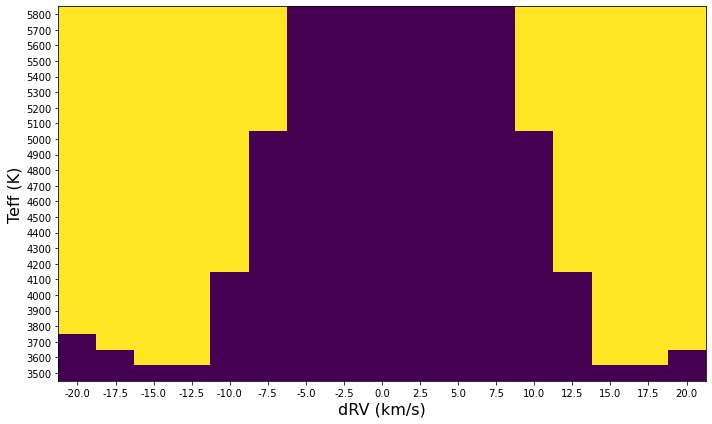

In [6]:
plt.figure(figsize=(10,6))
plt.imshow(results_arr, origin="lower", aspect="auto")
plt.xticks(np.arange(len(dRVs)), dRVs)
plt.yticks(np.arange(len(Teffs)), Teffs)
plt.xlabel("dRV (km/s)", fontsize=16)
plt.ylabel("Teff (K)", fontsize=16)
plt.tight_layout()
plt.show()